In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("../data/preprocessed_data/germany_weekly_testing_data.csv")
data.head()

,tests_done,positivity_rate,year,week,time
0,69493,1.300850,2020,10,2020.188679
1,129291,4.977918,2020,11,2020.207547
2,374534,5.981566,2020,12,2020.226415
3,377599,8.996051,2020,13,2020.245283
4,417646,8.632430,2020,14,2020.264151


## Completeness

Columns with NaN-values have already been removed. Which weeks exist and are any of the missing?

In [10]:
min_year = data["year"].min()
max_year = data["year"].max()
min_year_data = data[data["year"] == min_year]
max_year_data = data[data["year"] == max_year]

print(f"Data ranges from {min_year}, W{min_year_data['week'].min()} to {data['year'].max()}, W{max_year_data['week'].max()}.")

Data ranges from 2020, W10 to 2022, W33.


In [5]:
for year in range(min_year, max_year+1):
    for week in range(1, 54):
        if year == min_year and week < min_year_data["week"].min():
            continue
        if year == max_year and week > max_year_data["week"].max():
            continue
        if not ((data["year"] == year) & (data["week"] == week)).any():
            print(f"Missing data for {year}, W{week}.")

Missing data for 2021, W53.


2021 had only 52 weeks. This means that there is data for every single week and the compleness score is 100%.

## Uniqueness

In [6]:
unique_dates = data.groupby(["year", "week"]).size().reset_index(name="count")
unique_dates[unique_dates["count"] > 1]

,year,week,count


No weeks are in the dataset multiple times.

## Validity

In [12]:
# get data type for each row
def isnumeric(x):
    try:
        float(x)
        return True
    except ValueError:
        return False
    
for row in data.iterrows():
    row = row[1]
    for col in data.columns:
        assert isnumeric(row[col])
print("All data conforms to expected data types.")

All data conforms to expected data types.


## Accuracy

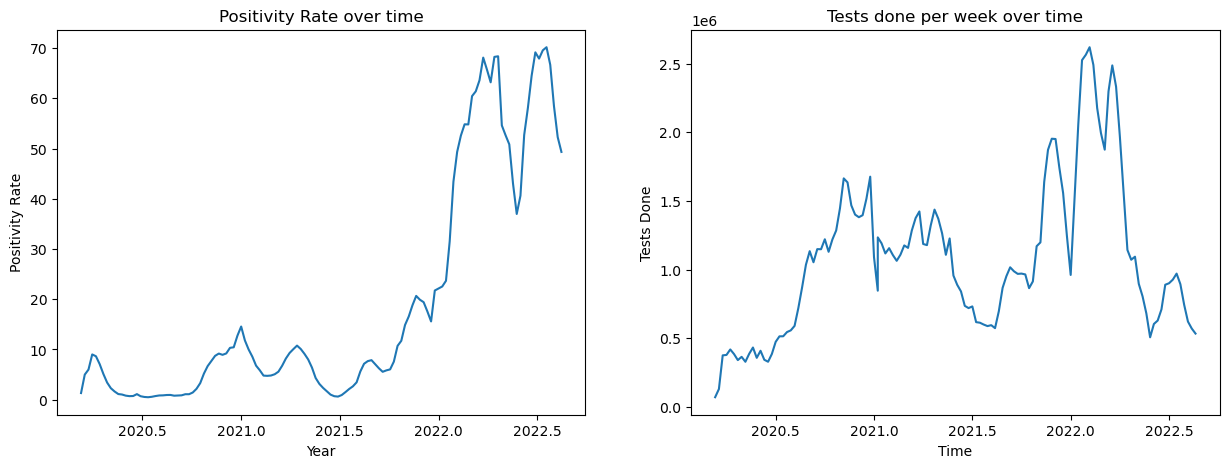

In [7]:
# plot the positivity rate over time
fig, axs = plt.subplots(1,2)
fig.set_figwidth(15)
fig.set_figheight(5)
ax = axs[0]

ax.plot(data["time"], data["positivity_rate"])
ax.set_xlabel("Year")
ax.set_ylabel("Positivity Rate")
ax.set_title("Positivity Rate over time")
# plot the number of tests done over time
ax = axs[1]
ax.plot(data["year"] + data["week"]/52, data["tests_done"])
ax.set_xlabel("Time")
ax.set_ylabel("Tests Done")
ax.set_title("Tests done per week over time")
plt.show()

Looks reasonable! There are no exceptionally large outliers and most weeks are fairly similar to their neighbors.